In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/
/content/drive/MyDrive


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

used_automobiles_data = pd.read_csv('autos.csv')
used_automobiles_data.describe()

<ipython-input-2-5b91957c9f6a>:6: DtypeWarning: Columns (0,5,8,10,12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  used_automobiles_data = pd.read_csv('autos.csv')


,nrOfPictures
count,371537.000000
mean,1.289468
std,282.433295
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,82319.000000


In [ ]:
# DATA CLEANING/PREPROCESSING
#1. Removing the duplicate rows
used_distinct_automobiles_data = used_automobiles_data.drop_duplicates()
used_distinct_automobiles_data.shape


(371440, 21)

In [ ]:
#2. Removing the missing values
used_distinct_automobiles_data.dropna(inplace=True)
used_distinct_automobiles_data.shape


<ipython-input-183-ccc31aed7273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_distinct_automobiles_data.dropna(inplace=True)


(260884, 21)

In [ ]:
used_distinct_automobiles_data.dtypes

index                   object
dateCrawled             object
name                    object
seller                  object
offerType               object
price                   object
abtest                  object
vehicleType             object
yearOfRegistration      object
gearbox                 object
powerPS                 object
model                   object
kilometer               object
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode              object
lastSeen                object
dtype: object

In [ ]:
#3. Data type conversion
used_distinct_automobiles_data['price'] = used_distinct_automobiles_data['price'].astype(float)
used_distinct_automobiles_data['kilometer'] = used_distinct_automobiles_data['kilometer'].astype(int)
used_distinct_automobiles_data['powerPS'] = used_distinct_automobiles_data['powerPS'].astype(int)
used_distinct_automobiles_data['monthOfRegistration'] = used_distinct_automobiles_data['monthOfRegistration'].astype(int)
used_distinct_automobiles_data['name'] = used_distinct_automobiles_data['name'].astype(str)

used_distinct_automobiles_data['dateCrawled'] = pd.to_datetime(used_distinct_automobiles_data['dateCrawled'])
used_distinct_automobiles_data['dateCreated'] = pd.to_datetime(used_distinct_automobiles_data['dateCreated'])
used_distinct_automobiles_data['lastSeen'] = pd.to_datetime(used_distinct_automobiles_data['lastSeen'])

used_distinct_automobiles_data.dtypes

<ipython-input-185-26218aad407c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_distinct_automobiles_data['price'] = used_distinct_automobiles_data['price'].astype(float)
<ipython-input-185-26218aad407c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_distinct_automobiles_data['kilometer'] = used_distinct_automobiles_data['kilometer'].astype(int)
<ipython-input-185-26218aad407c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

index                          object
dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                         float64
abtest                         object
vehicleType                    object
yearOfRegistration             object
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                  float64
postalCode                     object
lastSeen               datetime64[ns]
dtype: object

In [ ]:
#4. Text cleaning
# Function to format the name string
def format_vehicle_name(input_string):

    # To remove special characters (except _ and /) from the middle of the string
    formatted_name = re.sub(r'[^A-Za-z0-9_/]', '', input_string)
    # To remove _ and / from the start of the string
    formatted_name = re.sub(r'^[_/]+', '', formatted_name)
    return formatted_name

used_distinct_automobiles_data['name'] = used_distinct_automobiles_data['name'].apply(format_vehicle_name)
used_distinct_automobiles_data = used_distinct_automobiles_data[~used_distinct_automobiles_data['name'].str.contains(r'\d')]
used_distinct_automobiles_data['name'] = used_distinct_automobiles_data['name'].str.replace(r'(_{1,})', ' ')
used_distinct_automobiles_data = used_distinct_automobiles_data[used_distinct_automobiles_data['name'].str.strip() != '']
used_distinct_automobiles_data['name'] = used_distinct_automobiles_data['name'].str.upper()

print(used_distinct_automobiles_data.shape)

<ipython-input-186-d97719bb9a32>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_distinct_automobiles_data['name'] = used_distinct_automobiles_data['name'].apply(format_vehicle_name)


(37240, 21)


<ipython-input-186-d97719bb9a32>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  used_distinct_automobiles_data['name'] = used_distinct_automobiles_data['name'].str.replace(r'(_{1,})', ' ')
<ipython-input-186-d97719bb9a32>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_distinct_automobiles_data['name'] = used_distinct_automobiles_data['name'].str.upper()


In [ ]:
used_distinct_automobiles_data['name']

23                                   STADTFLITZER
43             MINI ONE PEPPER SCHECKHEFTGEPFLEGT
55                                AUTO OPEL ASTRA
68                           HONDA HRV RESERVIERT
71                                VOLKSWAGEN POLO
                           ...                   
371479                                 VW GOLF II
371491    SMART ROADSTER BLACK EDITIONSPORTCABRIO
371503                    OPEL CORSA B SWING GRAU
371512                           CHRYSLER VOYAGER
371531                               TURBO DEFEKT
Name: name, Length: 37240, dtype: object

In [ ]:
# 5. Handling misspelled words
gear_box_column_names = {'manuell': 'Manual',
                    'automatik': 'Automatic'}
used_distinct_automobiles_data['gearbox'] = used_distinct_automobiles_data['gearbox'].replace(gear_box_column_names)

fuel_type_column_names = {'benzin': 'benzene','elektro': 'electro'}

used_distinct_automobiles_data['fuelType'] = used_distinct_automobiles_data['fuelType'].replace(fuel_type_column_names)

not_rep_damage_column_names = {'nein': 'No','ja': 'Yes'}
used_distinct_automobiles_data['notRepairedDamage'] = used_distinct_automobiles_data['notRepairedDamage'].replace(not_rep_damage_column_names)

seller_column_names = {'privat': 'private'}
used_distinct_automobiles_data['seller'] = used_distinct_automobiles_data['seller'].replace(seller_column_names)

<ipython-input-188-cde8d52b10d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_distinct_automobiles_data['gearbox'] = used_distinct_automobiles_data['gearbox'].replace(gear_box_column_names)
<ipython-input-188-cde8d52b10d6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_distinct_automobiles_data['fuelType'] = used_distinct_automobiles_data['fuelType'].replace(fuel_type_column_names)
<ipython-input-188-cde8d52b10d6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
#6. Encoding Categorical variables
used_distinct_automobiles_data['model_id'] = pd.factorize(used_distinct_automobiles_data['model'])[0]
used_distinct_automobiles_data['abtest_id'] = pd.factorize(used_distinct_automobiles_data['abtest'])[0]
used_distinct_automobiles_data['vehicleType_id'] = pd.factorize(used_distinct_automobiles_data['vehicleType'])[0]
used_distinct_automobiles_data['gearbox_id'] = pd.factorize(used_distinct_automobiles_data['gearbox'])[0]
used_distinct_automobiles_data['notRepairedDamage_id'] = pd.factorize(used_distinct_automobiles_data['notRepairedDamage'])[0]

used_distinct_automobiles_data

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,model_id,abtest_id,vehicleType_id,gearbox_id,notRepairedDamage_id
23,23,2016-03-12,STADTFLITZER,private,Angebot,450.0,test,kleinwagen,1997,Manual,...,No,2016-03-12,0.0,9526,2016-03-21 01:46:00,0,0,0,0,0
43,43,2016-03-13,MINI ONE PEPPER SCHECKHEFTGEPFLEGT,private,Angebot,6990.0,test,limousine,2007,Manual,...,No,2016-03-13,0.0,59174,2016-03-21 17:17:00,1,0,1,0,0
55,55,2016-03-26,AUTO OPEL ASTRA,private,Angebot,550.0,test,kombi,1999,Manual,...,Yes,2016-03-26,0.0,56759,2016-04-01 23:17:00,2,0,2,0,1
68,68,2016-03-21,HONDA HRV RESERVIERT,private,Angebot,2100.0,control,suv,2000,Manual,...,No,2016-02-09,0.0,85244,2016-03-31 16:46:00,3,1,3,0,0
71,71,2016-03-08,VOLKSWAGEN POLO,private,Angebot,800.0,control,kleinwagen,1993,Manual,...,No,2016-03-08,0.0,8258,2016-04-05 23:46:00,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371479,371468,2016-04-04,VW GOLF II,private,Angebot,1550.0,test,kleinwagen,1990,Manual,...,No,2016-04-04,0.0,49086,2016-04-06 21:46:00,12,0,0,0,0
371491,371480,2016-03-26,SMART ROADSTER BLACK EDITIONSPORTCABRIO,private,Angebot,4499.0,control,cabrio,2006,Automatic,...,No,2016-03-26,0.0,63065,2016-04-07 01:16:00,47,1,5,1,0
371503,371492,2016-04-04,OPEL CORSA B SWING GRAU,private,Angebot,390.0,test,kleinwagen,1997,Automatic,...,Yes,2016-04-04,0.0,17509,2016-04-06 15:46:00,15,0,0,1,1
371512,371501,2016-03-26,CHRYSLER VOYAGER,private,Angebot,3900.0,test,bus,2003,Automatic,...,No,2016-03-26,0.0,34320,2016-04-06 09:16:00,100,0,4,1,0


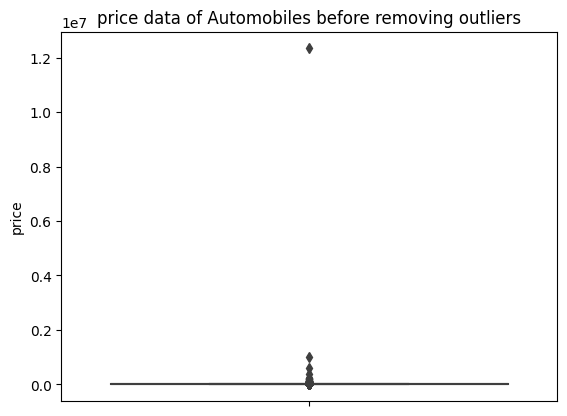

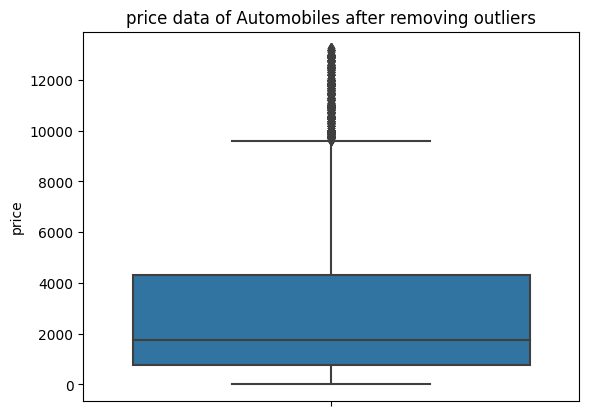

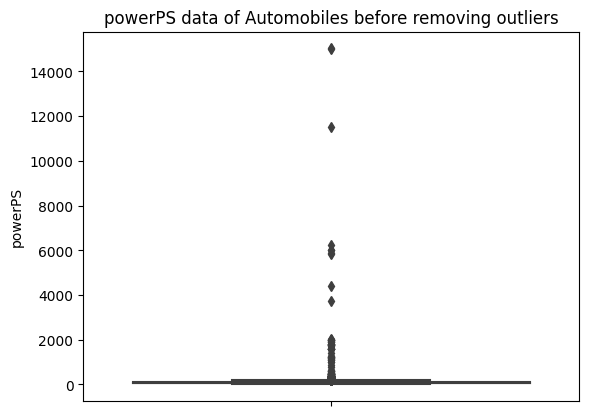

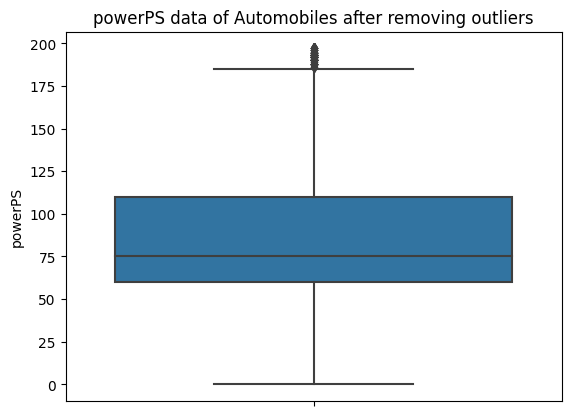

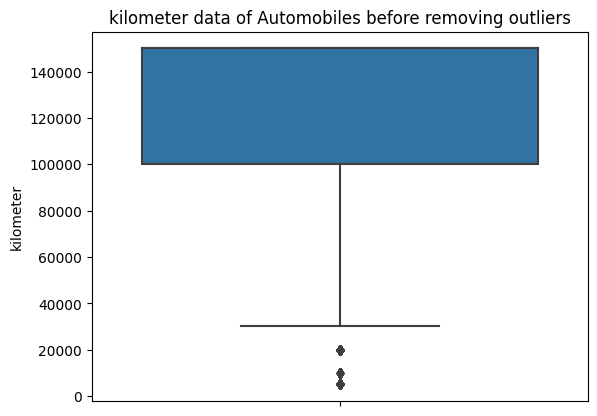

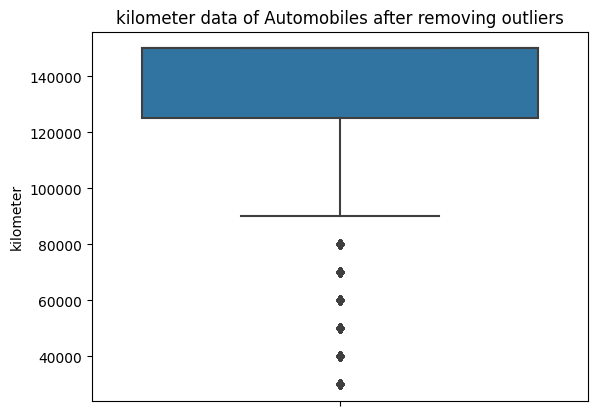

In [ ]:
#7. Handling outliers
handle_outlier_columns = ["price","powerPS","kilometer"]
for col in handle_outlier_columns:
  sns.boxplot(y = used_distinct_automobiles_data[col])
  plt.title(col + " data of Automobiles before removing outliers")
  plt.show()
  Q1 = used_distinct_automobiles_data[col].quantile(0.25)
  Q3 = used_distinct_automobiles_data[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Removing outliers
  used_distinct_automobiles_data = used_distinct_automobiles_data[(used_distinct_automobiles_data[col] >= lower_bound) & (used_distinct_automobiles_data[col] <= upper_bound)]
  sns.boxplot(y = used_distinct_automobiles_data[col])
  plt.title(col + " data of Automobiles after removing outliers")
  plt.show()

In [ ]:
#8. Removing invalid values
used_distinct_automobiles_data.drop(used_distinct_automobiles_data[used_distinct_automobiles_data['monthOfRegistration'] < 1].index, inplace=True)
used_distinct_automobiles_data.drop(used_distinct_automobiles_data[used_distinct_automobiles_data['monthOfRegistration'] > 12].index, inplace=True)
used_distinct_automobiles_data.drop(used_distinct_automobiles_data[used_distinct_automobiles_data['price'] < 120].index, inplace=True)
used_distinct_automobiles_data.drop(used_distinct_automobiles_data[used_distinct_automobiles_data['powerPS'] < 60].index, inplace=True)
used_distinct_automobiles_data.drop(used_distinct_automobiles_data[used_distinct_automobiles_data['powerPS'] > 500].index, inplace=True)

In [ ]:
#9. Column renaming
used_distinct_automobiles_data = used_distinct_automobiles_data.rename(columns={'nrOfPictures': 'noOfPictures'})

In [ ]:
# 10. Dropping columns with single value
preprocessed_automobiles_data = used_distinct_automobiles_data.drop(['noOfPictures', 'seller','offerType'], axis = 1)

In [ ]:
preprocessed_automobiles_data.to_csv('used_automobiles_preprocessed_data.csv', index=False)

In [ ]:
# EXPLORATORY DATA ANALYSIS
# 1. Analyzing number of unique and null values and type of the column
list_types = pd.DataFrame({
    'Number of Unique values':preprocessed_automobiles_data.nunique(),
    'Number of Null values':preprocessed_automobiles_data.isna().sum(),
    'DataType':preprocessed_automobiles_data.dtypes.values
})
display(list_types)

,Number of Unique values,Number of Null values,DataType
index,22561,0,object
dateCrawled,34,0,datetime64[ns]
name,11841,0,object
price,1014,0,float64
abtest,2,0,object
vehicleType,8,0,object
yearOfRegistration,102,0,object
gearbox,2,0,object
powerPS,135,0,int64
model,220,0,object


<ipython-input-196-2ad64d38460d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(preprocessed_automobiles_data.corr(),annot=True);


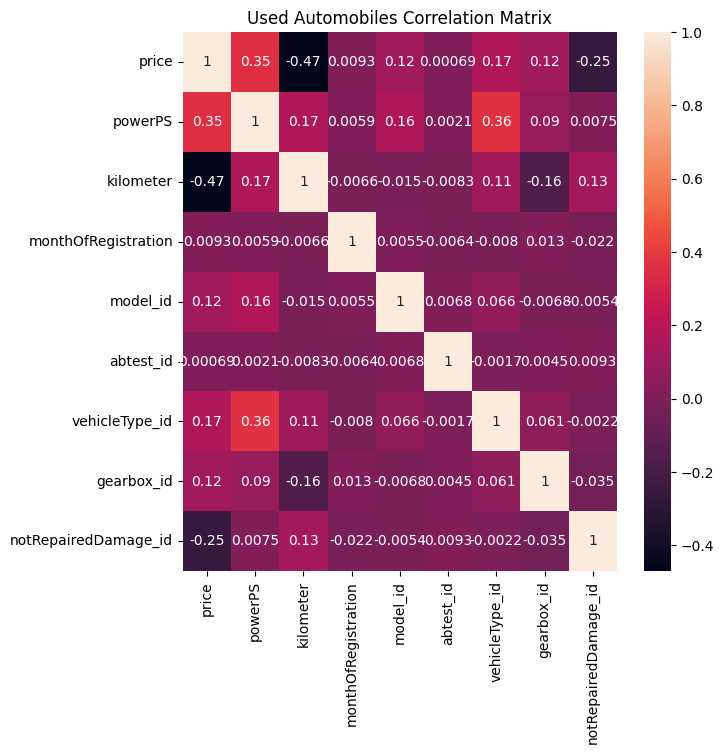

In [ ]:
#2. Plotting a correlation matrix
plt.figure(figsize=(7,7))
heatmap=sns.heatmap(preprocessed_automobiles_data.corr(),annot=True);
heatmap.set_title('Used Automobiles Correlation Matrix');

In [ ]:
# 3. Binning
bins = [ 1944, 1957, 1969, 1981, 1993,2005,2017]
labels = ['(1944,1957]', '(1957,1969]', '(1969,1981]', '(1983,1993]', '(1993,2005]','(2005,2017]']
preprocessed_automobiles_data['yearOfRegistration'] = preprocessed_automobiles_data['yearOfRegistration'].astype(int)
preprocessed_automobiles_data['yearwise'] = pd.cut(preprocessed_automobiles_data['yearOfRegistration'], bins, labels=labels)
preprocessed_automobiles_data.head()

,index,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,...,notRepairedDamage,dateCreated,postalCode,lastSeen,model_id,abtest_id,vehicleType_id,gearbox_id,notRepairedDamage_id,yearwise
43,43,2016-03-13,MINI ONE PEPPER SCHECKHEFTGEPFLEGT,6990.0,test,limousine,2007,Manual,95,one,...,No,2016-03-13,59174,2016-03-21 17:17:00,1,0,1,0,0,"(2005,2017]"
68,68,2016-03-21,HONDA HRV RESERVIERT,2100.0,control,suv,2000,Manual,105,andere,...,No,2016-02-09,85244,2016-03-31 16:46:00,3,1,3,0,0,"(1993,2005]"
84,84,2016-03-09,FORD ESCORT CLX,600.0,test,limousine,1994,Manual,75,escort,...,Yes,2016-03-09,37359,2016-04-05 23:44:00,6,0,1,0,1,"(1993,2005]"
86,86,2016-03-12,SUBARU FORESTER,1600.0,test,kombi,1997,Automatic,122,forester,...,No,2016-03-12,87497,2016-03-15 06:46:00,7,0,2,1,0,"(1993,2005]"
90,90,2016-03-07,RENAULT SCENIC,2990.0,test,bus,2004,Manual,113,scenic,...,No,2016-03-07,41836,2016-03-09 06:15:00,8,0,4,0,0,"(1993,2005]"


In [ ]:
# 4. Data Summarization
preprocessed_automobiles_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,model_id,abtest_id,vehicleType_id,gearbox_id,notRepairedDamage_id
count,22561.000000,22561.000000,22561.000000,22561.000000,22561.000000,22561.000000,22561.000000,22561.000000,22561.000000,22561.000000
mean,3384.581667,2002.031116,98.199193,127003.457294,6.242365,37.880989,0.476397,1.842693,0.148043,0.151412
std,3050.820067,5.982585,31.295617,34540.707130,3.335381,42.566836,0.499454,1.960364,0.355151,0.358458
min,120.000000,1955.000000,60.000000,30000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,999.000000,1999.000000,75.000000,100000.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,2300.000000,2002.000000,90.000000,150000.000000,6.000000,22.000000,0.000000,1.000000,0.000000,0.000000
75%,4950.000000,2006.000000,116.000000,150000.000000,9.000000,55.000000,1.000000,3.000000,0.000000,0.000000
max,13250.000000,2017.000000,197.000000,150000.000000,12.000000,235.000000,1.000000,7.000000,1.000000,1.000000


In [ ]:
# 5. Summary statistics grouping by yearwise
def get_statistics_of_the_years(x):
    return pd.Series([len(x), x.min(), x.max()], index=['count', 'min', 'max'])

automobiles_used_yearly = preprocessed_automobiles_data.groupby('yearwise')['yearOfRegistration'].apply(get_statistics_of_the_years)
automobiles_used_yearly

yearwise          
(1944,1957]  count        2
             min       1955
             max       1957
(1957,1969]  count       29
             min       1960
             max       1969
(1969,1981]  count      140
             min       1970
             max       1981
(1983,1993]  count     1254
             min       1982
             max       1993
(1993,2005]  count    14509
             min       1994
             max       2005
(2005,2017]  count     6627
             min       2006
             max       2017
Name: yearOfRegistration, dtype: int64

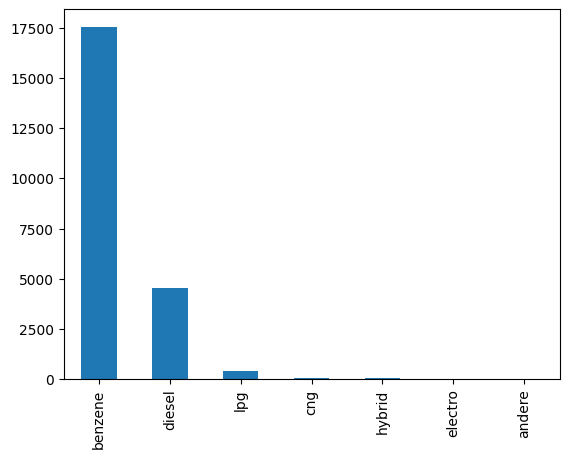

In [ ]:
# 6. Data visualization
preprocessed_automobiles_data['fuelType'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# 7. Data summarization and aggregation grouping by yearwise
automobiles_used_yearly = preprocessed_automobiles_data.groupby('yearwise')[['price', 'powerPS', 'kilometer']].describe()
automobiles_used_yearly

price                                                       \
               count          mean          std     min      25%      50%   
yearwise                                                                    
(1944,1957]      2.0  10572.000000  1233.194226  9700.0  10136.0  10572.0   
(1957,1969]     29.0   6557.206897  3233.012167   190.0   4670.0   6000.0   
(1969,1981]    140.0   5914.442857  3270.809187   500.0   3500.0   5000.0   
(1983,1993]   1254.0   2548.432217  2527.330053   120.0    750.0   1594.5   
(1993,2005]  14509.0   1983.362189  1790.319488   120.0    799.0   1400.0   
(2005,2017]   6627.0   6541.102460  2933.173481   132.0   4250.0   6200.0   

                               powerPS              ...                 \
                 75%      max    count        mean  ...     75%    max   
yearwise                                            ...                  
(1944,1957]  11008.0  11444.0      2.0   67.500000  ...   71.25   75.0   
(1957,1969]   9000.0  12900.0     29.0   80.482759  ...   88.00  143.0   
(1969,1981]   8000.0  13000.0    140.0   98.421429  ...  117.75  181.0   
(1983,1993]   3500.0  13000.0   1254.0   93.796651  ...  105.00  197.0   
(1993,2005]   2600.0  13200.0  14509.0   96.887863  ...  116.00  197.0   
(2005,2017]   8650.0  13250.0   6627.0  101.985363  ...  120.50  197.0   

            kilometer                                                   \
                count           mean           std       min       25%   
yearwise                                                                 
(1944,1957]       2.0  137500.000000  17677.669530  125000.0  131250.0   
(1957,1969]      29.0   91034.482759  38553.749826   40000.0   60000.0   
(1969,1981]     140.0  107892.857143  38896.967097   30000.0   80000.0   
(1983,1993]    1254.0  132531.897927  30273.905543   30000.0  125000.0   
(1993,2005]   14509.0  138526.087256  23457.817199   30000.0  150000.0   
(2005,2017]    6627.0  101287.913083  40921.292349   30000.0   70000.0   

                                           
                  50%       75%       max  
yearwise                                   
(1944,1957]  137500.0  143750.0  150000.0  
(1957,1969]   90000.0  125000.0  150000.0  
(1969,1981]  125000.0  150000.0  150000.0  
(1983,1993]  150000.0  150000.0  150000.0  
(1993,2005]  150000.0  150000.0  150000.0  
(2005,2017]  100000.0  150000.0  150000.0  

[6 rows x 24 columns]

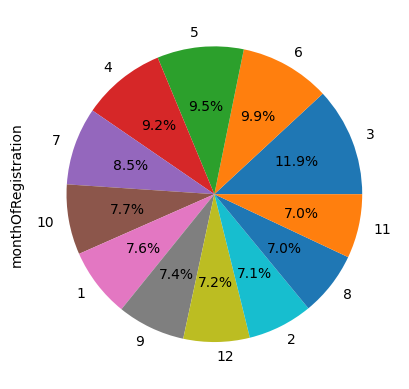

In [ ]:
# 8. Pie chart to visualize the automoniles' month of registration
preprocessed_automobiles_data['monthOfRegistration'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

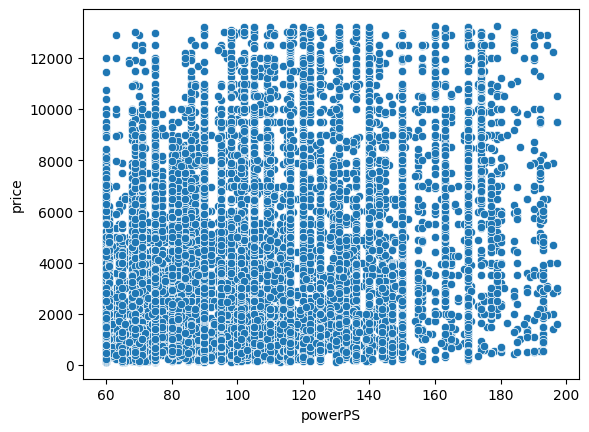

In [ ]:
# 9. Scatter plot to visualize price and power of car
sns.scatterplot(x = preprocessed_automobiles_data["powerPS"],y = preprocessed_automobiles_data["price"])
plt.show()

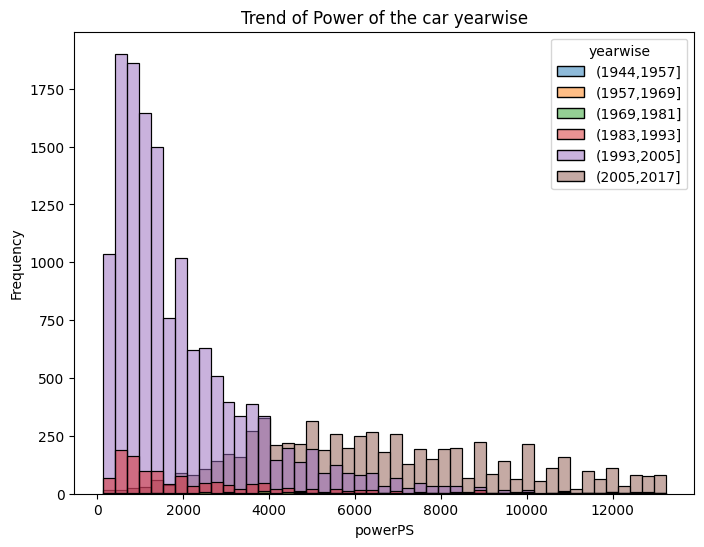

In [ ]:
#10. Plot to visualize the trend of power of the car yearwise
plt.figure(figsize=(8, 6))
sns.histplot(data = preprocessed_automobiles_data, x = preprocessed_automobiles_data["price"], hue = 'yearwise')
plt.xlabel('powerPS')
plt.ylabel('Frequency')
plt.title('Trend of Power of the car yearwise')
plt.show()

<Axes: xlabel='vehicleType', ylabel='powerPS'>

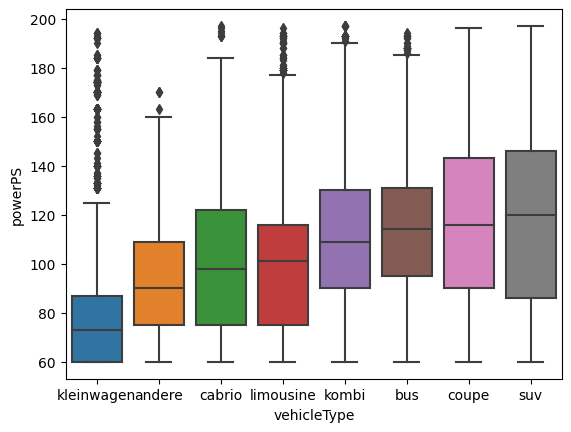

In [ ]:
#11. Box plot for vehicle type vs power of the car
groupAutomobiles = preprocessed_automobiles_data.groupby(['vehicleType'])['powerPS'].median().sort_values()
sns.boxplot(x = preprocessed_automobiles_data['vehicleType'], y = preprocessed_automobiles_data['powerPS'], order=list(groupAutomobiles.index))

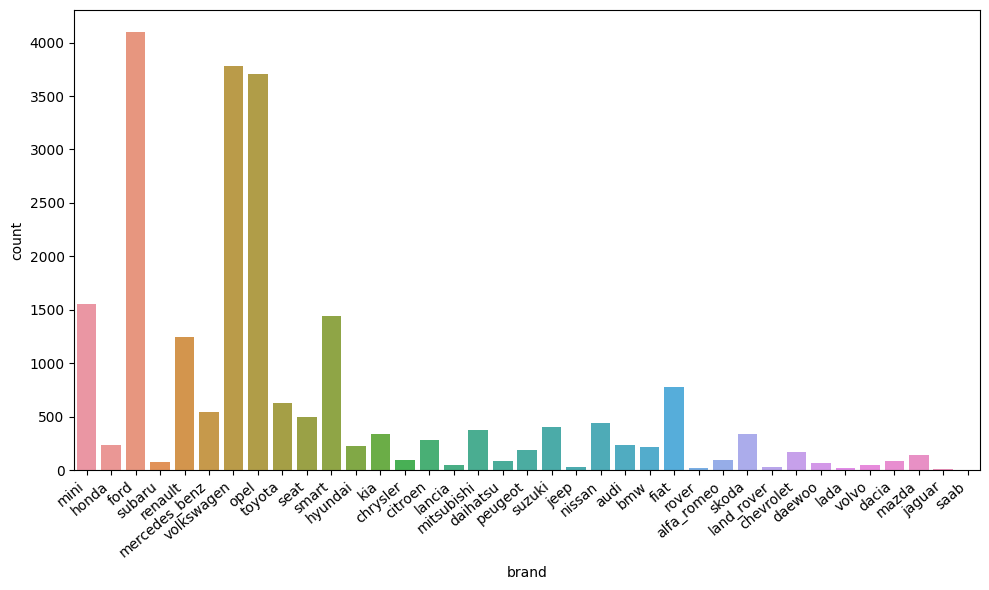

In [ ]:
# 12. Count plot of brand
plt.figure(figsize=(10, 6))
axis = sns.countplot(x = preprocessed_automobiles_data["brand"])
axis.set_xticklabels(axis.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()
plt.show()

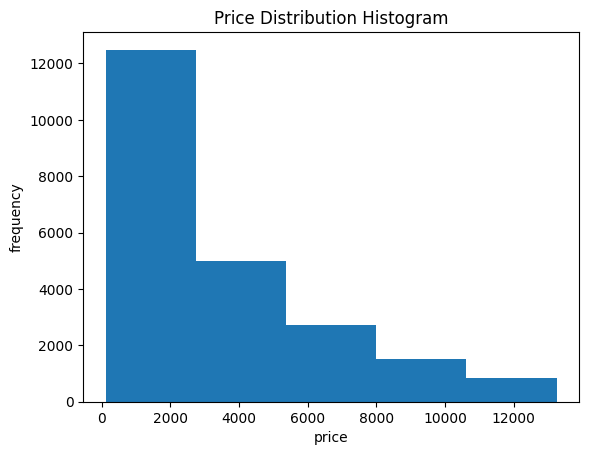

In [ ]:
# 13. Histogram plot for price distribution of the car
plt.hist(preprocessed_automobiles_data["price"],bins = 5)
plt.title("Price Distribution Histogram")
plt.xlabel("price")
plt.ylabel("frequency")
plt.show()

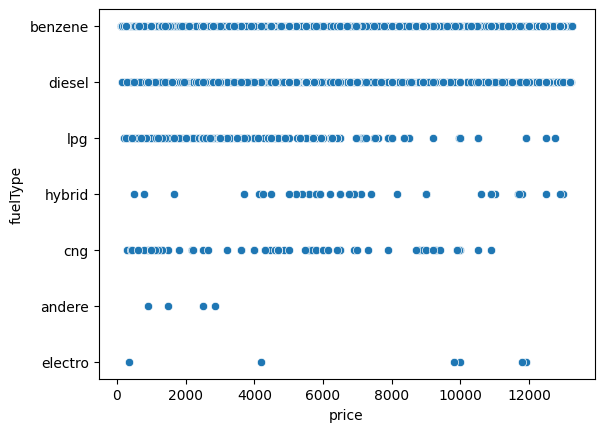

In [ ]:
#14. Scatter plot for price vs fuel type
sns.scatterplot(x = preprocessed_automobiles_data["price"],y = preprocessed_automobiles_data["fuelType"])
plt.show()

<Axes: xlabel='count', ylabel='abtest'>

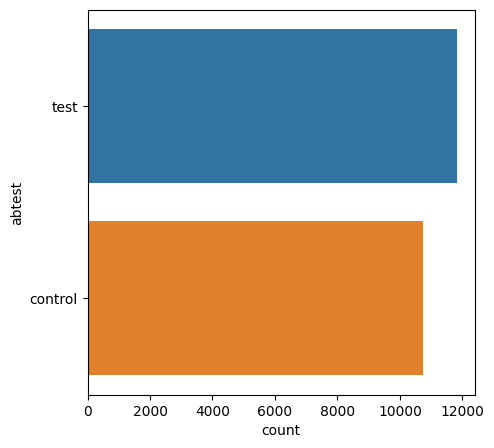

In [ ]:
# 15. Count plot of abtest
plt.figure(figsize = (5,5))
sns.countplot(y = preprocessed_automobiles_data['abtest'],order = preprocessed_automobiles_data['abtest'].value_counts().index)

<Axes: xlabel='yearOfRegistration', ylabel='price'>

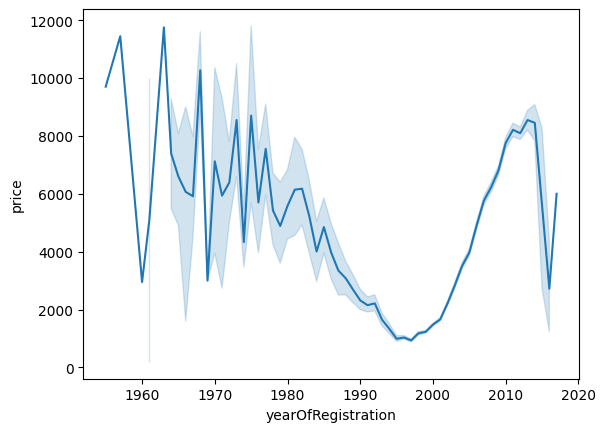

In [ ]:
#16. Line plot of year of resgistration and price of the car
sns.lineplot(x = preprocessed_automobiles_data['yearOfRegistration'], y = preprocessed_automobiles_data['price'])

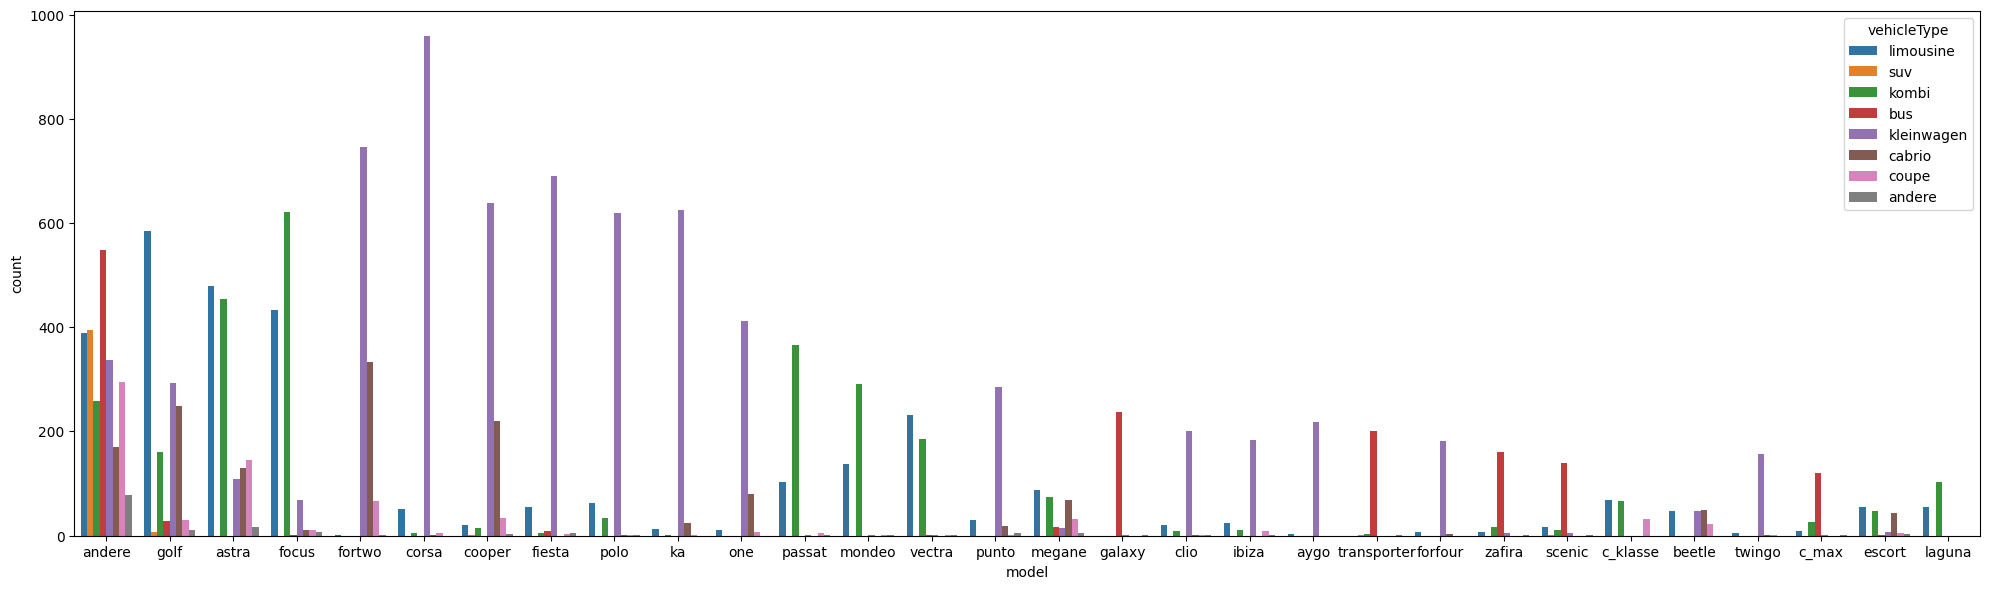

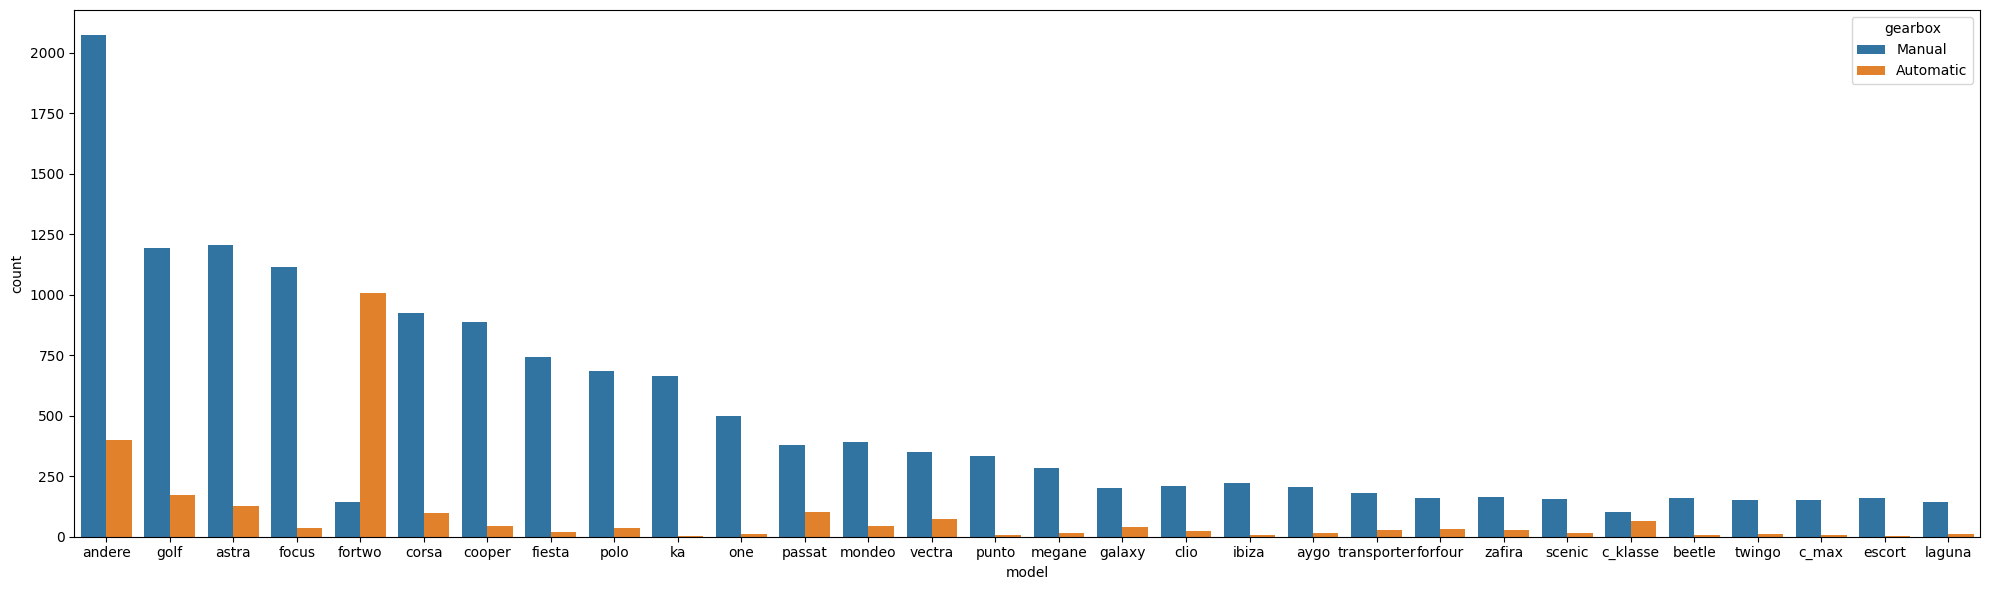

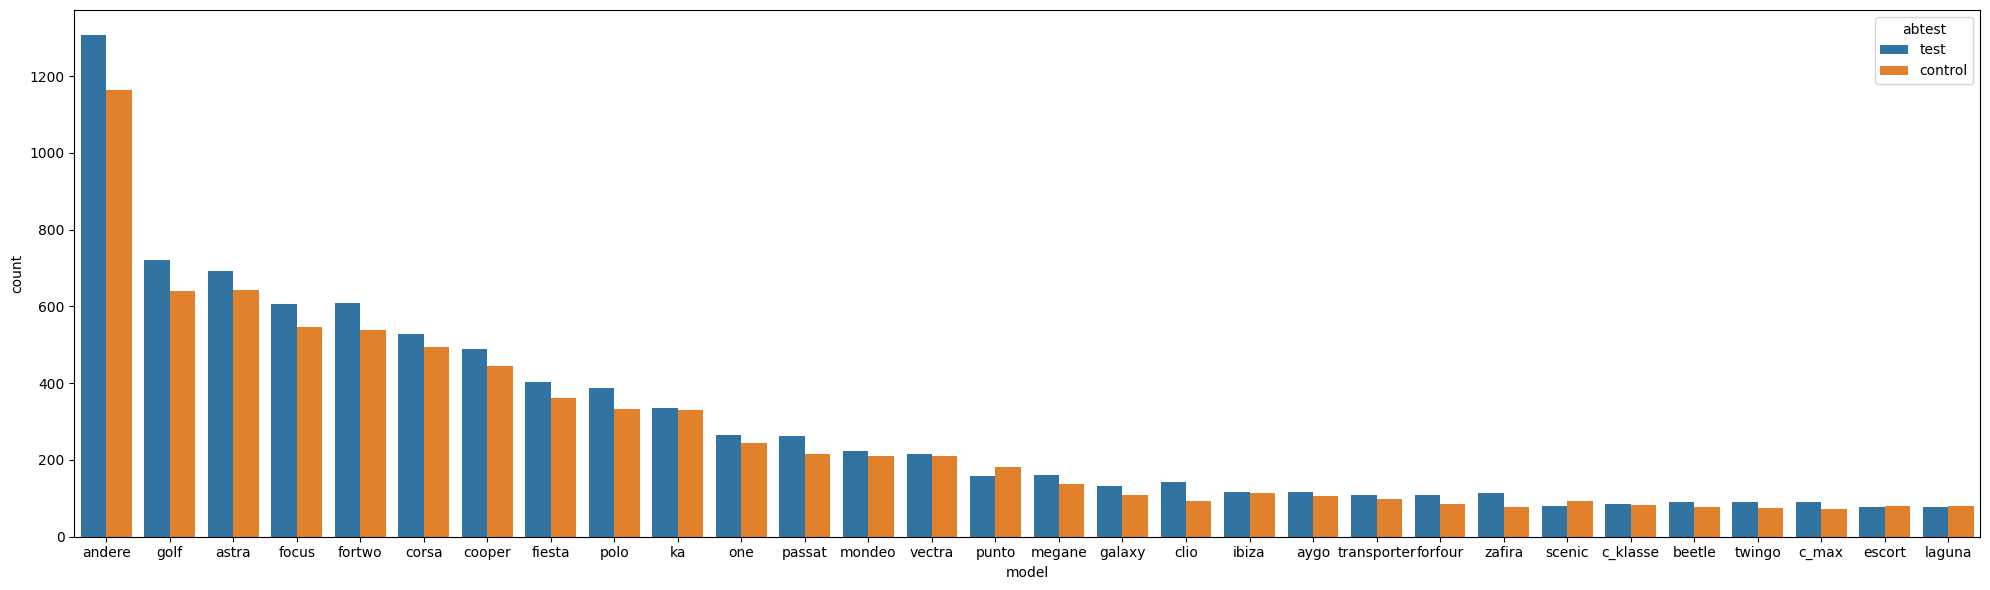

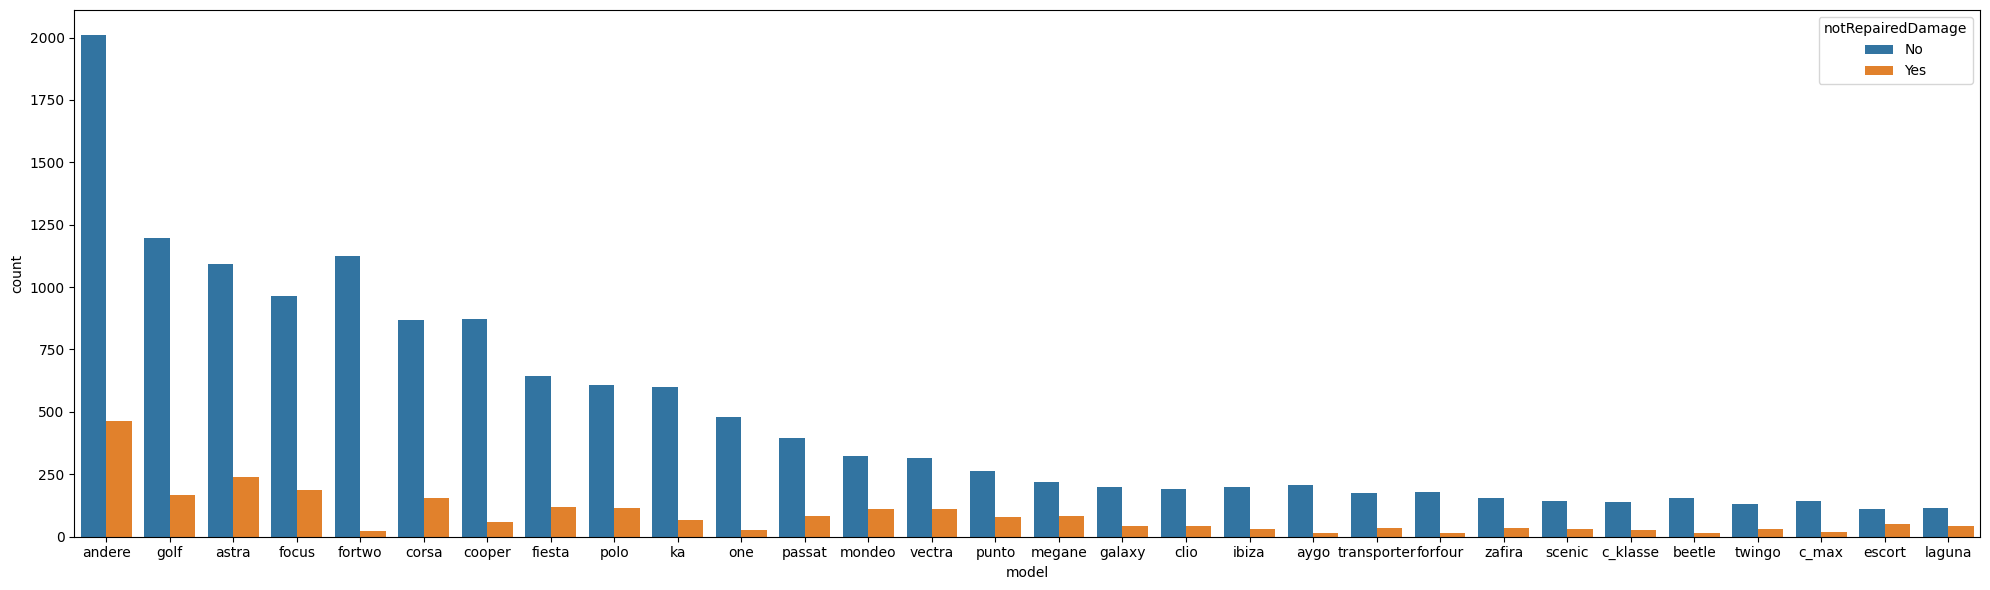

In [ ]:
# 17. Count plot between model and multiple featires
selected_cols = ['vehicleType','gearbox','abtest','notRepairedDamage']
for i in selected_cols:
  plt.figure(figsize=(20,6))
  sns.countplot(x=  preprocessed_automobiles_data['model'], order = preprocessed_automobiles_data['model'].value_counts().index[0:30], hue = preprocessed_automobiles_data[i])
  plt.tight_layout()
  plt.show()

PHASE 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from datetime import date
import matplotlib.pyplot as plt


In [44]:
# preprocessed_automobiles_data = pd.read_csv('autos_preprocessed_data.csv')
# preprocessed_automobiles_data.describe()

In [5]:
X = preprocessed_automobiles_data.drop(["price","dateCrawled","dateCreated","name","abtest","vehicleType","gearbox","model","fuelType","brand","notRepairedDamage","lastSeen","yearOfRegistration",
                                "monthOfRegistration","postalCode","index"], axis =1)
y = preprocessed_automobiles_data["price"]

In [6]:
X.dtypes

powerPS                 int64
kilometer               int64
model_id                int64
abtest_id               int64
vehicleType_id          int64
gearbox_id              int64
notRepairedDamage_id    int64
dtype: object

1. Linear Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_linear_reg = linear_reg_model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred_linear_reg)
mae = mean_absolute_error(y_test,y_pred_linear_reg)
print(f"Mean Squared Error: {mse:.2f}")
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f"Mean Absolute Error: {mae:.2f}")

r2 = r2_score(y_test, y_pred_linear_reg)
print(f"R-squared (R2) Score: ", r2 * 100)

Mean Squared Error: 5133113.11
Root Mean Squared Error: 2265.6374619642156
Mean Absolute Error: 1704.03
R-squared (R2) Score:  45.20266786931714


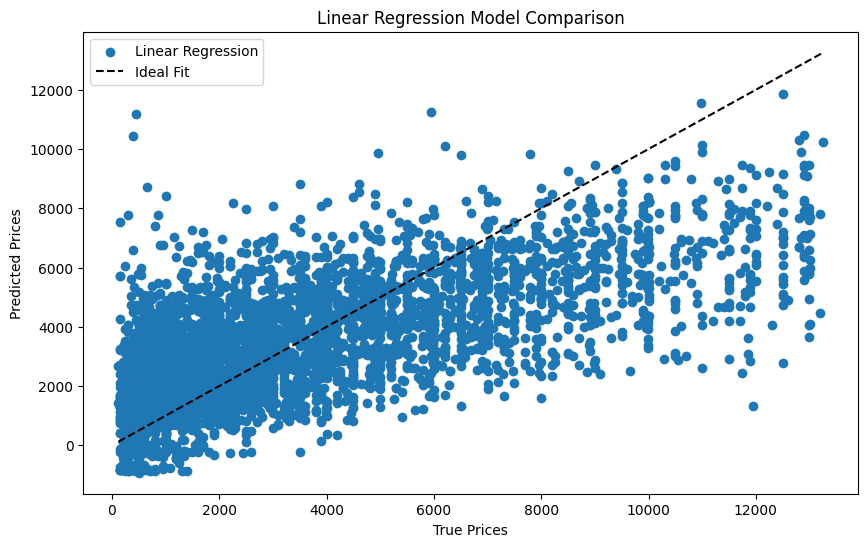

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_linear_reg, label='Linear Regression')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Model Comparison')
plt.legend()
plt.show()

2. Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

best_degree = None
best_mse = float('inf')

for degree in range(1, 6):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_polynomial = poly_features.fit_transform(X_train)
    X_val_polynomial = poly_features.transform(X_val)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_polynomial, y_train)

    y_val_prediced = poly_reg.predict(X_val_polynomial)

    mse = mean_squared_error(y_val, y_val_prediced)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print(f"Best Degree: {best_degree}")

Best Degree: 2


In [18]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_polynomial = poly_features.fit_transform(X_train)
X_test_polynomial = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_polynomial, y_train)

y_pred_poly_reg = poly_reg.predict(X_test_polynomial)

In [19]:
poly_reg_mse = mean_squared_error(y_test, y_pred_poly_reg)
poly_reg_mae = mean_absolute_error(y_test,y_pred_poly_reg)
print(f"Mean Squared Error: {poly_reg_mse:.2f}")
print(f'RMSE: {np.sqrt(poly_reg_mse)}')
print(f"Mean Absolute Error: {poly_reg_mae:.2f}")

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred_poly_reg)
print(f"R-squared (R2) Score: ", r2 * 100)

Mean Squared Error: 4942055.25
RMSE: 2223.0733793536037
Mean Absolute Error: 1626.32
R-squared (R2) Score:  47.24226075124531


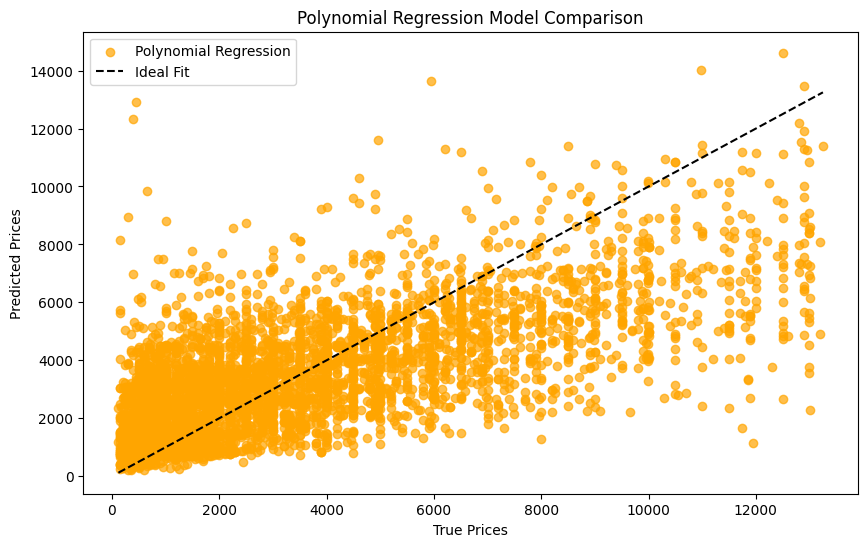

In [20]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_poly_reg, color="orange",label='Polynomial Regression', alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Polynomial Regression Model Comparison')
plt.legend()
plt.show()

3. KNN Model

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor()

param_grid = {'n_neighbors': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]}

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

knn_reg_model = KNeighborsRegressor(n_neighbors=best_k)
knn_reg_model.fit(X_train, y_train)

y_pred_knn_model = knn_reg_model.predict(X_test)

knn_model_mse = mean_squared_error(y_test, y_pred_knn_model)
print(f"Optimal K: {best_k}")
print(f"Mean Square error: {knn_model_mse}")
knn_model_r2_score = r2_score(y_test, y_pred_knn_model)
print(f"r2_score: ", knn_model_r2_score*100)

Optimal K: 6
Mean Square error: 3755724.0820715465
r2_score:  59.90665790056191


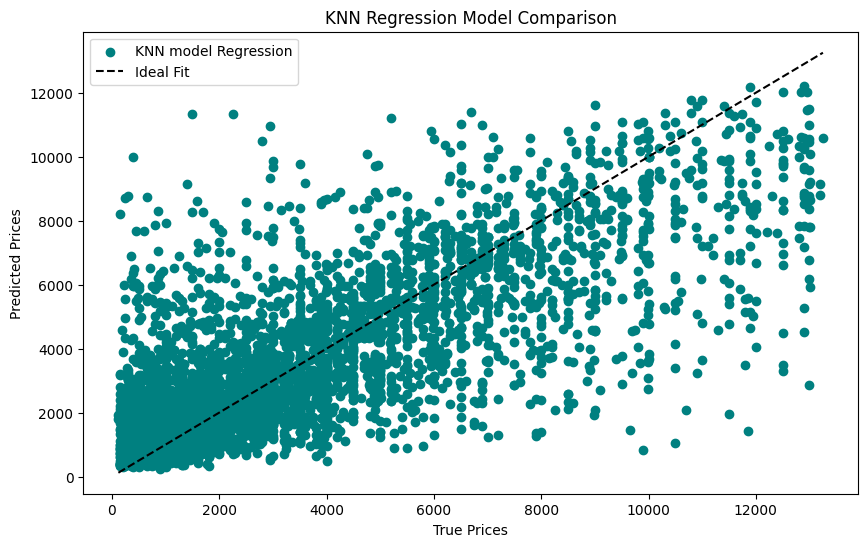

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_knn_model, color="teal", label='KNN model Regression')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('KNN Regression Model Comparison')
plt.legend()
plt.show()

4. Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=120, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)

In [25]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2 * 100)

Mean Squared Error: 3051108.499746251
R-squared: 67.42861451223632


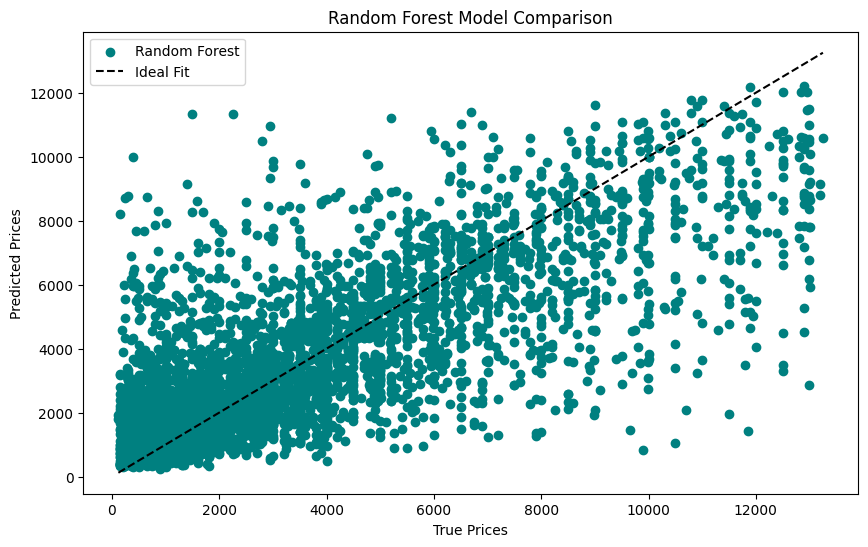

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_knn_model, color="teal", label='Random Forest')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Model Comparison')
plt.legend()
plt.show()

5. Gradient Boosting

In [31]:
!pip install xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

In [32]:
xgb_model = xgb.train(params, dtrain)
y_pred_xgb_model = xgb_model.predict(dtest)

In [36]:
xgb_mse = mean_squared_error(y_test, y_pred_xgb_model)
print(f'Mean Squared Error: {xgb_mse:.2f}')
xgb_r2 = r2_score(y_test, y_pred_xgb_model)
print("R-squared:", xgb_r2 * 100)

Mean Squared Error: 5680155.22
R-squared: 39.362849523629215


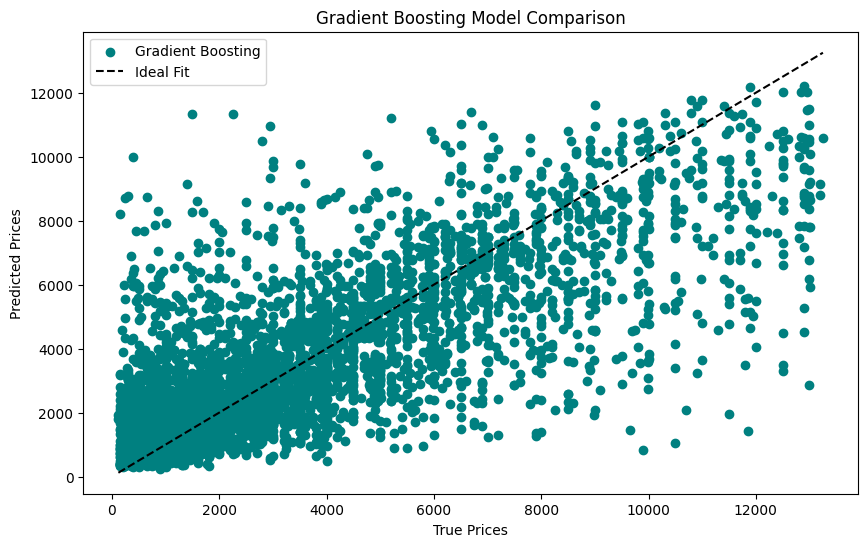

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_knn_model, color="teal", label='Gradient Boosting')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Model Comparison')
plt.legend()
plt.show()

6. Bayesian Ridge Regression

In [38]:
from sklearn.linear_model import BayesianRidge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

br_model = BayesianRidge()
br_model.fit(X_train, y_train)
y_pred_br_reg = br_model.predict(X_test)

In [42]:
br_reg_mse = mean_squared_error(y_test, y_pred_br_reg)
br_r2 = r2_score(y_test, y_pred_br_reg)

print(f'Mean Squared Error: {br_reg_mse:.2f}')
print(f"R-squared: ",br_r2 * 100)

Mean Squared Error: 5133090.75
R-squared:  45.20290659882736


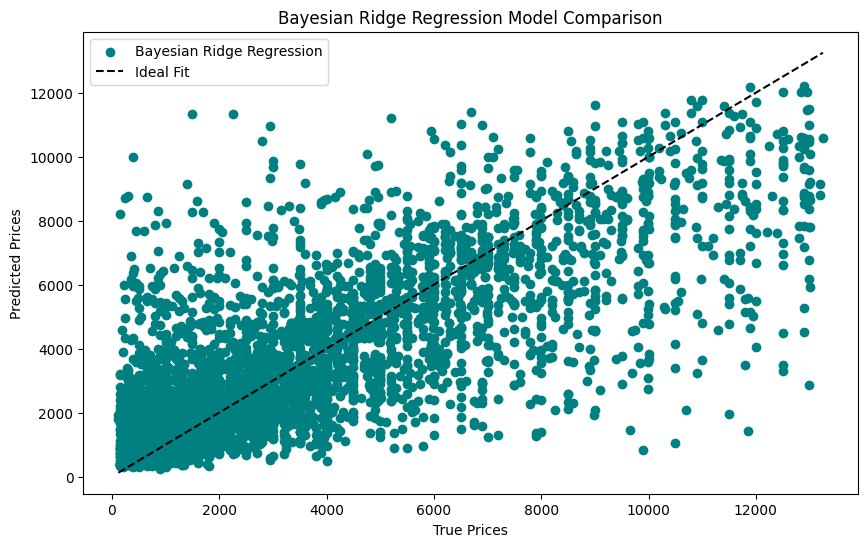

In [43]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_knn_model, color="teal", label='Bayesian Ridge Regression')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Bayesian Ridge Regression Model Comparison')
plt.legend()
plt.show()